In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import random
from scipy.special import expit
from scipy import optimize



# 0. Neural Network from Exercise 3

In [2]:
data_ex1 = scipy.io.loadmat('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 4/machine-learning-ex3/ex3/ex3data1.mat')
X =  data_ex1['X']
#adding the x0 = 1 at the start of each row in the X.
X = np.insert(X,0,1,axis=1)
y =  data_ex1['y']
#lables of 0 was 10 , so converting back to zero
y [y [:] == 10] = 0


#note:
#X is a 2D array with 5000 pics, each pic rolled into one row (20*20 pixels)    
#y is a 1D array with values from 1 to 10 (0 is labeled as 10)    

print (X.shape)
print('************************************')
print (y.shape)
np.unique(y)

(5000, 401)
************************************
(5000, 1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [3]:
#we already had the model trained. we just comuted the  value of the output layer
mat = scipy.io.loadmat( '/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 4/machine-learning-ex3/ex3/ex3weights.mat' )
Theta1, Theta2 = mat['Theta1'], mat['Theta2']
print ('Theta1 has shape:',Theta1.shape)
print ('Theta2 has shape:',Theta2.shape)

Theta1 has shape: (25, 401)
Theta2 has shape: (10, 26)


In [4]:
def hypothesis(X, theta):
    #hypothesis(X, theta)
    return expit(np.dot(X,theta))

### 0.2 Writing the code for the forward propagation from Exercise 3 

In [5]:
a = np.zeros(Theta2.shape)
a[0] = Theta2[9]
a[1:10] = Theta2[0:9]
Theta2 = a

a2 = hypothesis(X, Theta1.T)
a2= np.insert(a2,0,1,axis=1)
a3 = hypothesis(a2, Theta2.T)
hypothesis_output = pd.DataFrame(a3)

In [6]:
all_classification = []
for i in range(X.shape[0]):
    all_classification.append(np.argmax(hypothesis_output.loc[i,[0,1,2,3,4,5,6,7,8,9]]))
    
    
Answer= pd.DataFrame({'Output':y.flatten(),'Hypothesis':all_classification})

In [7]:
Answer[Answer['Hypothesis']==Answer['Output']].shape[0]/Answer.shape[0]*100

97.52

# 1. Exercise 4 Neural Network 

### Defining X and y

In [8]:
data_ex1 = scipy.io.loadmat('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 5/machine-learning-ex4/ex4/ex4data1.mat')

X =  data_ex1['X']
#adding the x0 = 1 at the start of each row in the X.
X = np.insert(X,0,1,axis=1)
y =  data_ex1['y']
#lables of 0 was 10 , so converting back to zero
y [y [:] == 10] = 0


#note:
#X is a 2D array with 5000 pics, each pic rolled into one row (20*20 pixels) + 1 for the x0 or the bias unit at the first layer
#y is a 1D array with values from 1 to 10 (0 is labeled as 10)    

#for input into the cost function as a 1D Array


X_flat= X.flatten()
y_training = np.zeros((5000,10))
for i in range(5000):
    y_training[i][y[i]] = 1

print (X.shape)
print('************************************')
print (y.shape)
np.unique(y)

(5000, 401)
************************************
(5000, 1)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Defining the Theta (here is the ones already trained)

In [9]:
mat = scipy.io.loadmat( '/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 5/machine-learning-ex4/ex4/ex4weights.mat')
#mat = scipy.io.loadmat( '/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 4/machine-learning-ex3/ex3/ex3weights.mat' )
Theta1, Theta2 = mat['Theta1'], mat['Theta2']

a = np.zeros(Theta2.shape)
a[0] = Theta2[9]
a[1:10] = Theta2[0:9]
Theta2 = a

Theta1 = Theta1.T
Theta2 = Theta2.T

Theta = [Theta1,Theta2]
print ('Theta1 has shape:',Theta1.shape)
print ('Theta2 has shape:',Theta2.shape)



Theta1 has shape: (401, 25)
Theta2 has shape: (26, 10)


### Defining the misc parameters of the model

In [10]:
output_layer = 10
input_layer = 400
number_of_layers = 3
hidden_layer = 25
m = 5000
mylambda = 0

print(X.shape)
print(y.shape)
print(Theta1.shape)
print(Theta2.shape)

(5000, 401)
(5000, 1)
(401, 25)
(26, 10)


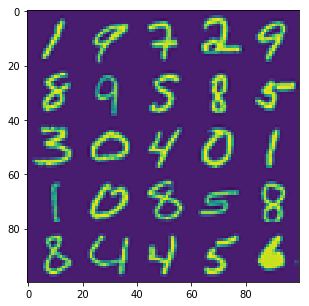

In [11]:
def array_20x20(row_num,X):
    #function to stich the one number into a 20*20 array based on the row number in the X 
    height = 20
    width = 20
    
    return X[row_num,1:].reshape(height,width).T

def stiched_image_mxn (m,n,X):
    #function to stich m*n random images together and display them. returns the rownumber array selected randomly
    #and the y of the seleced images in m*n array.
    #a, b = stiched_image_mxn (5,5,X)
    rows_to_show = np.reshape(random.sample(range(5000),m*n),(m,n))
    
    stiched_image = np.ones((m*20,n*20))
    stiched_y = np.ones((m,n))
    
    for i in range(m):
        for j in range(n):
            row_num = rows_to_show[i][j]
            stiched_image[i*20:((i+1)*20),j*20:((j+1)*20)] = array_20x20(row_num,X)
            stiched_y[i][j] = y[rows_to_show[i][j]][0]
            
    plt.figure(figsize = (5,5))
    plt.imshow(stiched_image)
    
    return rows_to_show, stiched_y

rows_to_show,stiched_y= stiched_image_mxn (5,5,X)

In [12]:
def unflatten_X(X_flat,m,input_layer):
    """
    Reurns X_flat
    Unflatten the input features to the m*(input_layer+1) size
    """
    
    output = X_flat.reshape((m,(input_layer+1)))
    return output

def flatten_Theta(Theta,number_of_layers):
    """
    Returns Theta_flat
    Flatten the input Theta list  to 1d Size
    """    
    intermediate= []
    output =  np.empty(1,)
    for i in range(number_of_layers-1):
        intermediate.append(1)
        intermediate[i] = Theta[i].flatten()
    
    for i in range(number_of_layers-1):
        output = np.concatenate((output,intermediate[i]))
    
    output = output[1:]
    return output

def unflatten_Theta(Theta_flat,number_of_layers):
    

    intermediate= []
    for i in range(number_of_layers-1):
        intermediate.append(1)
    
    a = Theta[0].shape[0]*Theta[0].shape[1]
    b = Theta[1].shape[0]*Theta[1].shape[1]   
    
    intermediate[0] = Theta_flat[0:a].reshape((401, 25))
    intermediate[1] = Theta_flat[a:].reshape((26, 10))
    
    return intermediate


In [13]:


def hypothesis_nn(Theta,X,number_of_layers,input_layer,output_layer,m):
    """
    1.Theta as the list of the two or more thetas.Shape is like (j,(i+1)) for each of the two or more thetas concerned. 
    2.X is the feature list of kind (m , (s1+1)) [s1 = number of input units] 
    3.number of layers in the network. (integer)
    4.no of categories in the input (integer)
    5.no of categories in the output (integer)
    6.no of training examples 
    
    returns an array of shape (m,output_layer_units)
    
    """
    if (m == 1):
        X = X.reshape((1,401))
    
    
    layers_var = {}
    theta_var  = {}
    layers_for_loop = {}
    
    
    #layers_var
    for i in range(1,number_of_layers):
        layers_var['a'+str(i+1)] = ''
        
    #theta_var
    for i in range(number_of_layers-1):
        theta_var['Theta'+str(i+1)] = Theta[i]
        
    iterative_list = list(layers_var.keys())[:]
    iterative_list.pop()
    iterative_list = ['X'] + iterative_list
    
    for i in iterative_list:
        layers_for_loop[i] = ''
    
    layers_for_loop['X'] = X
    
    #print(layers_var.keys())
    #print(theta_var.keys())
    #print(layers_for_loop.keys())
    
    
    old_i = False
    for i,j,k in zip(layers_var.keys(),theta_var.keys(),layers_for_loop.keys()):
            if (old_i != False):
                layers_for_loop[k] = layers_var[old_i]
                
            layers_var [i ] =  hypothesis(layers_for_loop[k], theta_var[j])
            if (i != list(layers_var.keys())[::].pop()):
                layers_var [i ] = np.insert(layers_var [i ],0,1,axis=1)
            old_i = i
            
    last_layer_to_display = list(layers_var.keys())[:].pop()
    hypothesis_output = pd.DataFrame(layers_var[last_layer_to_display])
    
    ##Use the below code if you want the max output as 1 and rest as the 0 for the given array
    
    #hypothesis_output_columns = list(range(output_layer))
    #new_column_values = list(np.zeros(output_layer))
    #
    #for i in range(X.shape[0]):
    #    #print(all_classification[i],' ',hypothesis_output.loc[i,all_classification[i]])
    #    hypothesis_output.loc[i,hypothesis_output_columns] = new_column_values
    #    hypothesis_output.loc[i,all_classification[i]] = 1
    
    return np.array(hypothesis_output),layers_var


def computeCost(Theta_flat):
    """
    1.Theta as the flattend Theta, we will change it 
      as the list of the two or more thetas.Shape is like (j,(i+1)) 
      for each of the two or more thetas concerned. 
    2.X as a flattend 1d- array, we will reshape it to (m , (s1+1)) [s1 = number of input units]  inside.
    3.number of layers in the network. (integer)
    4.no of categories in the input. (integer)
    5.no of categories in the output. (integer)
    6.No of training examples
    7.Value of the regulariztaion parameter
    
    returns the cost of the NN as a number 
    """
    Theta = unflatten_Theta(Theta_flat,number_of_layers)
    X = unflatten_X(X_flat,m,input_layer)
    
    
    result_master,layers_var = hypothesis_nn(Theta,X,number_of_layers,input_layer,output_layer,m)
    training_y_master = np.zeros(result_master.shape)
    
    for i in range(m):
        a = int(y[i])
        training_y_master [i][a] = 1
    
    sum_cost = 0 
    for i in range(output_layer):
        result  = result_master[:,i]
        training_y = training_y_master[:,i]    
        
        term1 = np.sum(np.dot(training_y.T,np.log( result ) ))
        term2 = np.sum(np.dot(( 1.0 - training_y.T ),np.log( 1.0 - result )))
        
        sum_cost += -(term1 + term2) / m
    
    sum_theta_squared = 0
    
    for i in range(len(Theta)):
        sum_theta_squared = sum_theta_squared  + np.sum(np.square(Theta[i][1:]))    
    
    
    return sum_cost + sum_theta_squared*(mylambda/(2*m))



def random_theta():
    Theta = [1,1]
    Theta[0] = np.random.randn(401,25)*2*0.12 - 0.12
    Theta[1] = np.random.randn(26,10)*2*0.12 - 0.12

    return Theta

def cost_gradient(Theta_flat):
    
    
    Theta = unflatten_Theta(Theta_flat,number_of_layers)
    
    Delta2 = np.zeros((25,401))
    Delta3 = np.zeros((10,26))
        
        
    for i in range(m):
        Del3 = hypothesis_nn(Theta,X[i],number_of_layers,input_layer,output_layer,1)[1]['a3'].reshape((-1,)) - y_training[i]
        a2 =   hypothesis_nn(Theta,X[i],number_of_layers,input_layer,output_layer,1)[1]['a2'].reshape((-1,))
        Del2 = np.dot(Theta[1][1:],Del3)*(a2*(1-a2))[1:]
        Del3= Del3.reshape((-1,1))
        Del2 =Del2.reshape((-1,1))
        a2 = a2.reshape((-1,1))
        a1 = X[i].reshape((-1,1))
        
        Delta3 += np.dot(Del3,a2.T)/float(m)
        Delta2 += np.dot(Del2,a1.T)/float(m)
        
    Delta2 = Delta2.T
    Delta3 = Delta3.T
    Delta = [Delta2,Delta3]
            
    return flatten_Theta(Delta,3) 

In [14]:
Theta_flat = flatten_Theta(Theta,3)
print(computeCost(Theta_flat))

0.287629165161


In [16]:
%time
start_theta = flatten_Theta(random_theta(),number_of_layers)
result = optimize.fmin_cg(computeCost, x0=start_theta, fprime=cost_gradient,maxiter=200,disp=True,full_output=True)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs
         Current function value: 0.066335
         Iterations: 200
         Function evaluations: 473
         Gradient evaluations: 473


In [30]:
new_theta = unflatten_Theta(result[0],3)
hypo_back = pd.DataFrame(hypothesis_nn(new_theta,X,number_of_layers,input_layer,output_layer,m)[0])
all_classification = []
for i in range(X.shape[0]):
    all_classification.append(np.argmax(hypo_back.loc[i,[0,1,2,3,4,5,6,7,8,9]]))
Answer= pd.DataFrame({'Output':y.flatten(),'Hypothesis':all_classification})
Answer[Answer['Hypothesis']==Answer['Output']].shape[0]/Answer.shape[0]*100
#finally got the answer

99.46000000000001